# MBA Tech Campaing Performance — EDA, Cleaning, Preprocessing & Feature Engineering

## Objective of this Notebook
The goal of this notebook is to perform a comprehensive data preparation and exploratory analysis of the MBA Tech Campaign performance.csv dataset. This involves cleaning the raw data, engineering insightful marketing metrics, and creating visualizations to evaluate the effectiveness and efficiency of each campaign in generating leads.

## What We Have Done
- Data Cleaning & Preprocessing: The dataset was audited to identify and correct issues. This included standardizing column names, dropping irrelevant columns, correcting data types for dates and key metrics, and handling missing values by imputing them with appropriate values (e.g., 0 for leads, first recorded date for campaign starts).

- Feature Engineering: To enrich the dataset for deeper analysis, several new features were created, including core marketing metrics like Cost Per Lead (CPL), Cost Per Click (CPC), and Click-to-Lead Conversion Rate (CVR). Time-based features like day_of_week and campaign_duration_days were also added.

- Exploratory Data Analysis: The cleaned and enriched data was visualized to analyze campaign performance by spend, lead volume, cost-effectiveness (CPL), and conversion efficiency (CVR). We also explored weekly and daily performance patterns to identify trends.

Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# --- Notebook Settings ---
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=12)
pd.set_option('display.max_columns', None)

print("Libraries imported successfully.")

Libraries imported successfully.


Load the Dataset

In [2]:
# Load the dataset
file_path = r"C:\Users\aadhi\Documents\Internship\MBA Tech\MBA Tech Campaign performance.csv"
df_performance = pd.read_csv(file_path)

print("Dataset loaded successfully.")

Dataset loaded successfully.


## Initial Data Exploration

Initial Data Overview

In [3]:
# Display the first 5 rows of the dataset
display(df_performance.head())

,dates,campaign_id,campaign_name,campaign_start_date,creative_name,ad_id,total_spent,impressions,clicks,click_through_rate,leads,platform,ad_set_name,ad_set_id,years_of_experience,age,location,member_interest,degree,field_of_study,member_skills,job_titles,exclude_location,upload_timestamp
0,30-09-2024,295024176,MBATech_FT&CS_Lead-Gen-2_150324,15-Mar-24,MBATech_Static-4_Salary,392278996,0,0,0,0%,0.0,LinkedIn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05-11-2024,120212285593820229,MBA_Tech_C-2_Lead_Gen-2_210924,NaN,Regula_VS_Tech_Static_240924,120212341312480229,256.78,3247,12,1.10871574,2.0,Facebook,Lookalike_Hot_Warm_Token_Enrol_210924,1.202123e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05-11-2024,120212285593820229,MBA_Tech_C-2_Lead_Gen-2_210924,NaN,1.2_Cr_Static_200924,120212285781150229,5879.27,78710,290,0.51962902,35.0,Facebook,Lookalike_Hot_Warm_Token_Enrol_210924,1.202123e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19-10-2024,295014746,MBATech_AL&AI_Lead-Gen-2_150324,15-Mar-24,MBATech_Static-4_Salary,392279606,0,0,0,0%,0.0,LinkedIn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21-10-2024,295054696,MBATech_DP&PM_Lead-Gen-3_150324,15-Mar-24,MBATech_Static-5_Job,392298726,0,0,0,0%,0.0,LinkedIn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Structure and Types

In [4]:
# Get a summary of the dataframe's structure
print("--- Dataframe Info ---")
df_performance.info()

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dates                6178 non-null   object 
 1   campaign_id          6178 non-null   int64  
 2   campaign_name        6178 non-null   object 
 3   campaign_start_date  1390 non-null   object 
 4   creative_name        6178 non-null   object 
 5   ad_id                6178 non-null   int64  
 6   total_spent          6178 non-null   object 
 7   impressions          6178 non-null   object 
 8   clicks               5604 non-null   object 
 9   click_through_rate   6178 non-null   object 
 10  leads                4292 non-null   float64
 11  platform             6178 non-null   object 
 12  ad_set_name          4508 non-null   object 
 13  ad_set_id            4508 non-null   float64
 14  years_of_experience  0 non-null      float64
 15  age            

Dataset and Dimentions

In [5]:
# Display the shape of the dataframe
print(f"\nThe dataset has {df_performance.shape[0]} rows and {df_performance.shape[1]} columns.")


The dataset has 6178 rows and 24 columns.


Comprehensive Statistical Summary

In [6]:
# Generate a detailed summary for all columns
print("--- Dataframe Description ---")
display(df_performance.describe(include='all'))

--- Dataframe Description ---


,dates,campaign_id,campaign_name,campaign_start_date,creative_name,ad_id,total_spent,impressions,clicks,click_through_rate,leads,platform,ad_set_name,ad_set_id,years_of_experience,age,location,member_interest,degree,field_of_study,member_skills,job_titles,exclude_location,upload_timestamp
count,6178,6.178000e+03,6178,1390,6178,6.178000e+03,6178,6178,5604,6178,4292.000000,6178,4508,4.508000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,117,NaN,27,5,38,NaN,5796,4269,393,3861,NaN,3,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,23-12-2024,NaN,MBATech_Program_Lead-gen-2_Analytics&Product_0...,24-Sep-24,1.2_Cr_Static_021124,NaN,0,0,1,0,NaN,Facebook,Prod+Ana+Fintech_Top_Token_Cities_260924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,90,NaN,724,1251,605,NaN,55,53,547,396,NaN,4421,695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.602530e+16,NaN,NaN,NaN,8.602547e+16,NaN,NaN,NaN,NaN,4.937558,NaN,NaN,1.178936e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.423591e+16,NaN,NaN,NaN,5.423600e+16,NaN,NaN,NaN,NaN,7.871599,NaN,NaN,1.654006e+16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.950048e+08,NaN,NaN,NaN,3.922790e+08,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.677020e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.501651e+08,NaN,NaN,NaN,5.604998e+08,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.202124e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.202124e+17,NaN,NaN,NaN,1.202124e+17,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.202141e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.202141e+17,NaN,NaN,NaN,1.202143e+17,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,1.202141e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Duplicate Check

In [7]:
# Check for and Count any Duplicates
duplicate_rows = df_performance[df_performance.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 70


Missing Values

In [8]:
# Missing Values
print("--- Missing Values ---")
missing_values = df_performance.isnull().sum()
display(missing_values[missing_values > 0])

--- Missing Values ---


campaign_start_date    4788
clicks                  574
leads                  1886
ad_set_name            1670
ad_set_id              1670
years_of_experience    6178
age                    6178
location               6178
member_interest        6178
degree                 6178
field_of_study         6178
member_skills          6178
job_titles             6178
exclude_location       6178
upload_timestamp       6178
dtype: int64

Visualize Missing Data

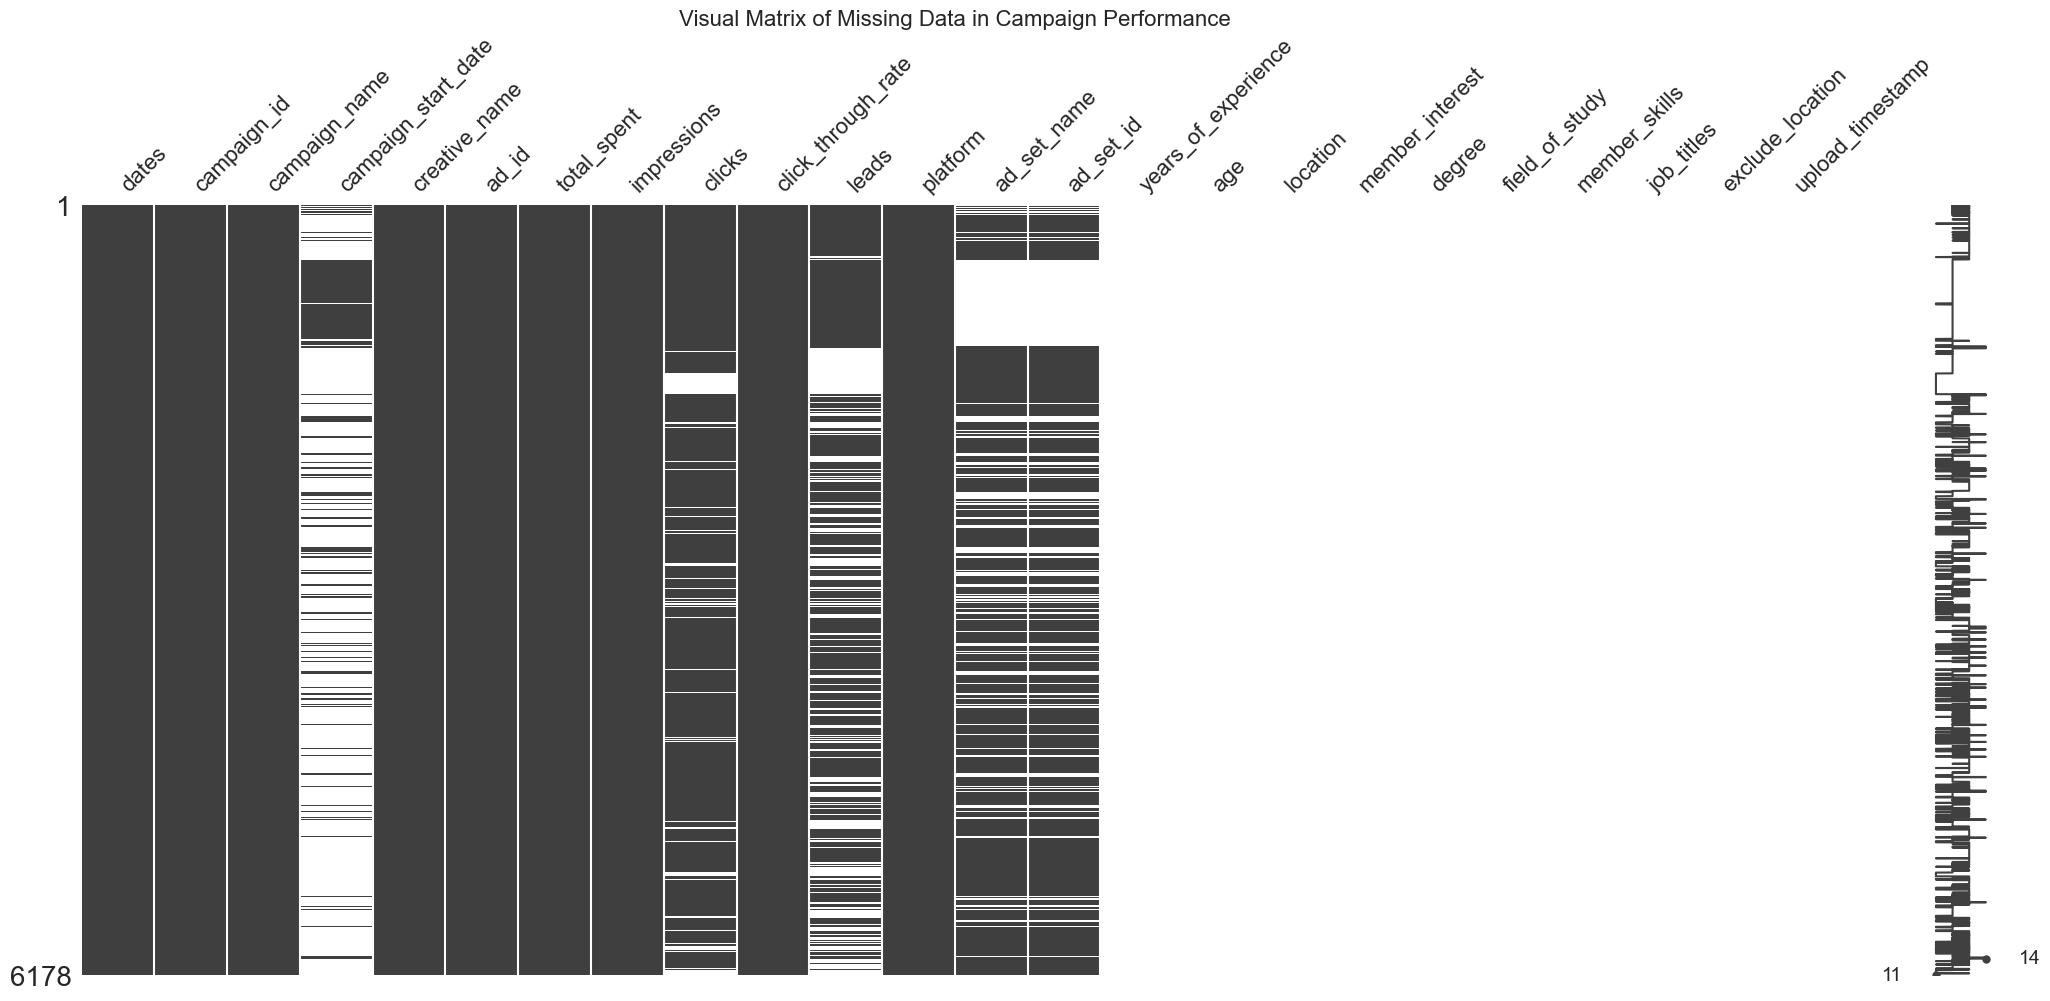

In [9]:
msno.matrix(df_performance)
plt.title('Visual Matrix of Missing Data in Campaign Performance', fontsize=16)
plt.show()

Check for Unique Values (Cardinality)

In [10]:
# Display the number of unique values for each column
print("\n--- Number of Unique Values (Cardinality) Per Column ---")
print(df_performance.nunique())


--- Number of Unique Values (Cardinality) Per Column ---
dates                   117
campaign_id              27
campaign_name            27
campaign_start_date       5
creative_name            38
ad_id                   163
total_spent            5796
impressions            4269
clicks                  393
click_through_rate     3861
leads                    61
platform                  3
ad_set_name              16
ad_set_id                17
years_of_experience       0
age                       0
location                  0
member_interest           0
degree                    0
field_of_study            0
member_skills             0
job_titles                0
exclude_location          0
upload_timestamp          0
dtype: int64


Unique values on each Column

In [11]:
print("--- Number of Unique Values (Cardinality) Per Column ---")
print(df_performance.nunique())

--- Number of Unique Values (Cardinality) Per Column ---
dates                   117
campaign_id              27
campaign_name            27
campaign_start_date       5
creative_name            38
ad_id                   163
total_spent            5796
impressions            4269
clicks                  393
click_through_rate     3861
leads                    61
platform                  3
ad_set_name              16
ad_set_id                17
years_of_experience       0
age                       0
location                  0
member_interest           0
degree                    0
field_of_study            0
member_skills             0
job_titles                0
exclude_location          0
upload_timestamp          0
dtype: int64


 Analyze Categorical Feature Distribution

In [12]:
# Select the key categorical columns to inspect
categorical_cols_to_check = ['platform', 'campaign_name']

# Loop through the columns and print their top 10 value counts
for col in categorical_cols_to_check:
    print(f"--- Top 10 Value Counts for: {col} ---")
    print(df_performance[col].value_counts().nlargest(10))
    print("\n" + "="*40 + "\n")

--- Top 10 Value Counts for: platform ---
platform
Facebook     4421
LinkedIn     1670
GoogleAds      87
Name: count, dtype: int64


--- Top 10 Value Counts for: campaign_name ---
campaign_name
MBATech_Program_Lead-gen-2_Analytics&Product_041124    724
MBATech_Program_Lead-gen-3_Fintech&cyber_041124        724
MBA_Tech_C-2_Lead_Gen-3_260924                         695
MBA_Tech_C-2_Lead_Gen-2_210924                         684
MBATech_C2_LeadGen-2_240924                            672
MBATech_C2_LeadGen-1_240924                            579
MBA_TECH_C2_Lead_Gen-5_191124                          346
MBA_Tech_C2_Lead_Gen-1_021124                          321
MBA_Tech_c2_Lead_Gen-4_141124                          261
MBATech_C2_LeadGen-3_061124                            247
Name: count, dtype: int64




## Data Cleaning and Preprocessing

Standardize Column Names

In [13]:
# Convert all column names to a consistent lowercase_snake_case format
df_performance.columns = [re.sub(r'\s+', '_', col.lower().strip()) for col in df_performance.columns]
print("Column names have been standardized.")

Column names have been standardized.


Drop Unnecessary Columns

In [14]:
# Drop columns identified as empty in the data audit
cols_to_drop = [
    'years_of_experience', 'age', 'location', 'member_interest',
    'degree', 'field_of_study', 'member_skills', 'job_titles',
    'exclude_location', 'upload_timestamp'
]
df_performance.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"Dropped {len(cols_to_drop)} unnecessary columns.")

Dropped 10 unnecessary columns.


Correct Data Types

In [15]:
# Convert date columns to datetime objects
date_cols = ['dates', 'campaign_start_date']
for col in date_cols:
    df_performance[col] = pd.to_datetime(df_performance[col], errors='coerce')

# Clean and convert key metric columns to numeric types
metric_cols = ['total_spent', 'impressions', 'clicks']
for col in metric_cols:
    # pd.to_numeric handles non-numeric values by turning them into NaN (Not a Number)
    df_performance[col] = pd.to_numeric(df_performance[col], errors='coerce')

# Clean and convert click_through_rate to a numeric float
# We remove the '%' sign, convert to float, and then divide by 100
df_performance['click_through_rate'] = df_performance['click_through_rate'].str.replace('%', '', regex=False).astype(float) / 100.0

print("Data types for dates and key metrics have been corrected.")

Data types for dates and key metrics have been corrected.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\1588873338.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_performance[col] = pd.to_datetime(df_performance[col], errors='coerce')
C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\1588873338.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_performance[col] = pd.to_datetime(df_performance[col], errors='coerce')


Handle Missing Values

In [16]:
# Impute missing values in 'clicks' and 'leads' with 0
df_performance['clicks'].fillna(0, inplace=True)
df_performance['leads'].fillna(0, inplace=True)

print("Missing values in 'clicks' and 'leads' have been handled.")

Missing values in 'clicks' and 'leads' have been handled.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\3176338093.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_performance['clicks'].fillna(0, inplace=True)
C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\3176338093.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Standardize Categorical Values

In [17]:
# Clean key categorical columns by converting to lowercase and stripping whitespace
text_cols_to_clean = ['campaign_name', 'platform']
for col in text_cols_to_clean:
    df_performance[col] = df_performance[col].str.lower().str.strip()

print("Key categorical columns have been standardized.")

Key categorical columns have been standardized.


Handle Remaining Missing Numerical Values

In [18]:
# Impute missing values in the core metric columns with 0
metric_cols_to_fill = ['total_spent', 'impressions']

for col in metric_cols_to_fill:
    df_performance[col].fillna(0, inplace=True)

print("Missing values in 'total_spent' and 'impressions' have been filled with 0.")

Missing values in 'total_spent' and 'impressions' have been filled with 0.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\1009806243.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_performance[col].fillna(0, inplace=True)


 Impute Missing Campaign Start Dates

In [19]:
# Create a mapping of the first appearance date for each campaign
first_date_map = df_performance.groupby('campaign_name')['dates'].min()

# Use this map to fill the missing start dates
df_performance['campaign_start_date'] = df_performance['campaign_start_date'].fillna(
    df_performance['campaign_name'].map(first_date_map)
)

print("Missing 'campaign_start_date' values have been imputed with the first recorded date for each campaign.")

Missing 'campaign_start_date' values have been imputed with the first recorded date for each campaign.


Outlier Detection using IQR

In [20]:
# --- 1. Identify the numerical metric columns to check for outliers ---
metric_cols_for_outliers = ['total_spent', 'impressions', 'clicks', 'leads']

# --- 2. Loop through each column to perform IQR outlier detection ---
for col in metric_cols_for_outliers:
    print(f"--- Outlier Analysis for: {col} ---")

    # Drop missing values for this calculation
    col_data = df_performance[col].dropna()

    # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # --- 3. Create a new boolean column to flag the outliers ---
    outlier_col_name = f'is_{col}_outlier'
    df_performance[outlier_col_name] = (df_performance[col] < lower_bound) | (df_performance[col] > upper_bound)

    # Report the findings
    num_outliers = df_performance[outlier_col_name].sum()
    print(f"Number of outliers flagged: {num_outliers}")
    print("-" * 30)

# --- 4. Display the first few rows with the new outlier flag columns ---
print("\n--- DataFrame Head with New Outlier Flag Columns ---")
display(df_performance.head())

--- Outlier Analysis for: total_spent ---
Number of outliers flagged: 806
------------------------------
--- Outlier Analysis for: impressions ---
Number of outliers flagged: 883
------------------------------
--- Outlier Analysis for: clicks ---
Number of outliers flagged: 769
------------------------------
--- Outlier Analysis for: leads ---
Number of outliers flagged: 587
------------------------------

--- DataFrame Head with New Outlier Flag Columns ---


,dates,campaign_id,campaign_name,campaign_start_date,creative_name,ad_id,total_spent,impressions,clicks,click_through_rate,leads,platform,ad_set_name,ad_set_id,is_total_spent_outlier,is_impressions_outlier,is_clicks_outlier,is_leads_outlier
0,2024-09-30,295024176,mbatech_ft&cs_lead-gen-2_150324,2024-03-15,MBATech_Static-4_Salary,392278996,0.00,0.0,0.0,0.000000,0.0,linkedin,NaN,NaN,False,False,False,False
1,2024-11-05,120212285593820229,mba_tech_c-2_lead_gen-2_210924,2024-09-21,Regula_VS_Tech_Static_240924,120212341312480229,256.78,3247.0,12.0,0.011087,2.0,facebook,Lookalike_Hot_Warm_Token_Enrol_210924,1.202123e+17,False,False,False,False
2,2024-11-05,120212285593820229,mba_tech_c-2_lead_gen-2_210924,2024-09-21,1.2_Cr_Static_200924,120212285781150229,5879.27,78710.0,290.0,0.005196,35.0,facebook,Lookalike_Hot_Warm_Token_Enrol_210924,1.202123e+17,True,True,True,True
3,2024-10-19,295014746,mbatech_al&ai_lead-gen-2_150324,2024-03-15,MBATech_Static-4_Salary,392279606,0.00,0.0,0.0,0.000000,0.0,linkedin,NaN,NaN,False,False,False,False
4,2024-10-21,295054696,mbatech_dp&pm_lead-gen-3_150324,2024-03-15,MBATech_Static-5_Job,392298726,0.00,0.0,0.0,0.000000,0.0,linkedin,NaN,NaN,False,False,False,False


C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\2626673029.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_performance, x=col, ax=axes[i], palette='viridis')
C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\2626673029.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_performance, x=col, ax=axes[i], palette='viridis')
C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\2626673029.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_performance, x=col, ax=axes[i], palette='viridis')
C:\Users\aadhi\AppData\Local

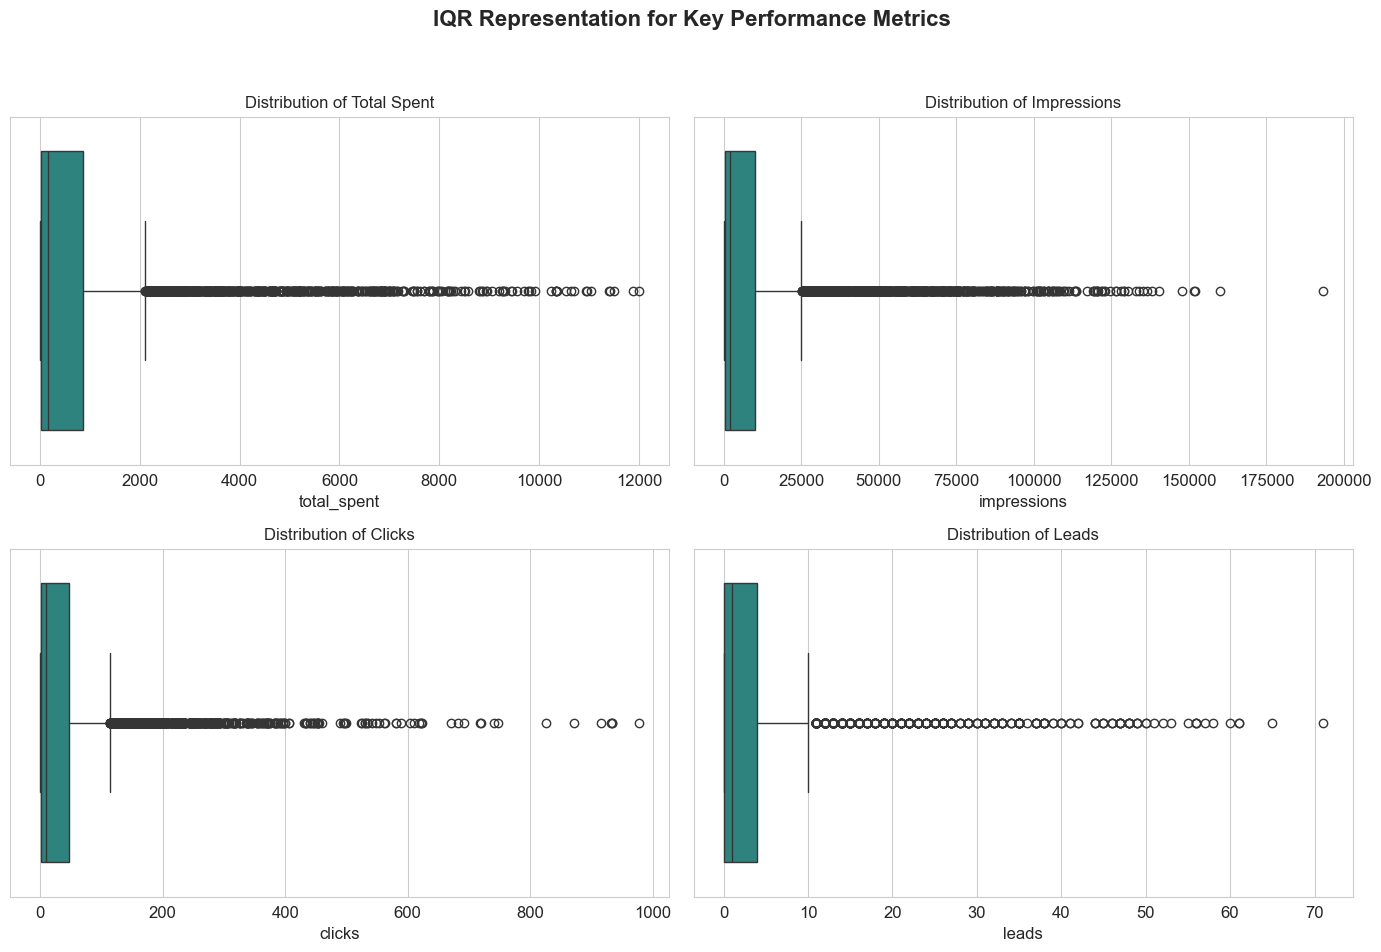

In [21]:
# Clean and convert key metric columns to numeric types
metric_cols = ['total_spent', 'impressions', 'clicks', 'leads']
for col in metric_cols:
    df_performance[col] = pd.to_numeric(df_performance[col], errors='coerce').fillna(0)

# --- Create Box Plots for Each Numerical Column ---

# Identify the relevant numerical columns
numerical_cols_to_plot = ['total_spent', 'impressions', 'clicks', 'leads']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('IQR Representation for Key Performance Metrics', fontsize=16, weight='bold')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate a box plot for each numerical column
for i, col in enumerate(numerical_cols_to_plot):
    sns.boxplot(data=df_performance, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=12)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [22]:
def flag_outliers_iqr(df, cols):
    """
    Flags outliers in a list of numerical columns in a DataFrame using the IQR method.
    """
    for col in cols:
        # Drop missing values for this calculation
        col_data = df[col].dropna()

        # Calculate Q1, Q3, and IQR
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Create a new boolean column to flag outliers
        outlier_col_name = f'is_{col}_outlier'
        df[outlier_col_name] = (df[col] < lower_bound) | (df[col] > upper_bound)

        # Report the findings
        num_outliers = df[outlier_col_name].sum()
        print(f"--- Outlier Analysis for: {col} ---")
        print(f"Number of outliers flagged: {num_outliers}")
        print("-" * 30)

    return df

# List of numerical columns to check
numerical_cols_to_check = ['total_spent', 'impressions', 'clicks', 'leads']

# Apply the function to your DataFrame
df_performance_flagged = flag_outliers_iqr(df_performance, numerical_cols_to_check)

# Display the first few rows with the new outlier

--- Outlier Analysis for: total_spent ---
Number of outliers flagged: 806
------------------------------
--- Outlier Analysis for: impressions ---
Number of outliers flagged: 883
------------------------------
--- Outlier Analysis for: clicks ---
Number of outliers flagged: 769
------------------------------
--- Outlier Analysis for: leads ---
Number of outliers flagged: 587
------------------------------


## Feature Engineering

Calculate Core Marketing Metrics

In [23]:
# --- 1. Calculate Cost Per Lead (CPL) ---
# We replace any division by zero with 0, assuming no leads means no cost per lead.
df_performance['cpl'] = (df_performance['total_spent'] / df_performance['leads']).fillna(0)
# Replace infinite values that might occur if leads is 0 but spent is not
df_performance['cpl'] = df_performance['cpl'].replace([np.inf, -np.inf], 0)


# --- 2. Calculate Cost Per Click (CPC) ---
df_performance['cpc'] = (df_performance['total_spent'] / df_performance['clicks']).fillna(0)
df_performance['cpc'] = df_performance['cpc'].replace([np.inf, -np.inf], 0)


# --- 3. Display the new columns to verify ---
print("--- Created Core Marketing Metric Features ---")
display(df_performance[['campaign_name', 'total_spent', 'leads', 'clicks', 'cpl', 'cpc']].head())

--- Created Core Marketing Metric Features ---


,campaign_name,total_spent,leads,clicks,cpl,cpc
0,mbatech_ft&cs_lead-gen-2_150324,0.00,0.0,0.0,0.000000,0.000000
1,mba_tech_c-2_lead_gen-2_210924,256.78,2.0,12.0,128.390000,21.398333
2,mba_tech_c-2_lead_gen-2_210924,5879.27,35.0,290.0,167.979143,20.273345
3,mbatech_al&ai_lead-gen-2_150324,0.00,0.0,0.0,0.000000,0.000000
4,mbatech_dp&pm_lead-gen-3_150324,0.00,0.0,0.0,0.000000,0.000000


Engineer Time-Based Features

In [24]:
# --- 1. Create new columns for the day of the week and the month ---
df_performance['day_of_week'] = df_performance['dates'].dt.day_name()
df_performance['month'] = df_performance['dates'].dt.month_name()


# --- 2. Display the new columns to verify ---
print("\n--- Created Time-Based Features ---")
display(df_performance[['dates', 'day_of_week', 'month']].head())


--- Created Time-Based Features ---


,dates,day_of_week,month
0,2024-09-30,Monday,September
1,2024-11-05,Tuesday,November
2,2024-11-05,Tuesday,November
3,2024-10-19,Saturday,October
4,2024-10-21,Monday,October


Engineer a Conversion Rate Metric

In [25]:
# --- 1. Calculate Click-to-Lead Conversion Rate (CVR) ---
# We calculate (leads / clicks). We handle division by zero by filling the result with 0.
df_performance['conversion_rate'] = (df_performance['leads'] / df_performance['clicks']).fillna(0)

# Replace any potential infinite values if clicks is 0
df_performance['conversion_rate'] = df_performance['conversion_rate'].replace([np.inf, -np.inf], 0)

# --- 2. Display the new column to verify ---
print("--- Created 'conversion_rate' Feature ---")
display(df_performance[['campaign_name', 'clicks', 'leads', 'conversion_rate']].head())

--- Created 'conversion_rate' Feature ---


,campaign_name,clicks,leads,conversion_rate
0,mbatech_ft&cs_lead-gen-2_150324,0.0,0.0,0.000000
1,mba_tech_c-2_lead_gen-2_210924,12.0,2.0,0.166667
2,mba_tech_c-2_lead_gen-2_210924,290.0,35.0,0.120690
3,mbatech_al&ai_lead-gen-2_150324,0.0,0.0,0.000000
4,mbatech_dp&pm_lead-gen-3_150324,0.0,0.0,0.000000


Calculate Campaign Duration

In [26]:
# --- 1. Ensure 'dates' and 'campaign_start_date' are datetime objects ---
# This step is crucial for date calculations
df_performance['dates'] = pd.to_datetime(df_performance['dates'])
df_performance['campaign_start_date'] = pd.to_datetime(df_performance['campaign_start_date'])

# --- 2. Calculate the campaign's age in days at each data point ---
df_performance['campaign_duration_days'] = (df_performance['dates'] - df_performance['campaign_start_date']).dt.days

# --- 3. Display the new column to verify ---
print("\n--- Created 'campaign_duration_days' Feature ---")
display(df_performance[['campaign_name', 'campaign_start_date', 'dates', 'campaign_duration_days']].head())


--- Created 'campaign_duration_days' Feature ---


,campaign_name,campaign_start_date,dates,campaign_duration_days
0,mbatech_ft&cs_lead-gen-2_150324,2024-03-15,2024-09-30,199
1,mba_tech_c-2_lead_gen-2_210924,2024-09-21,2024-11-05,45
2,mba_tech_c-2_lead_gen-2_210924,2024-09-21,2024-11-05,45
3,mbatech_al&ai_lead-gen-2_150324,2024-03-15,2024-10-19,218
4,mbatech_dp&pm_lead-gen-3_150324,2024-03-15,2024-10-21,220


Creating an Interaction Feature

In [27]:
# --- 1. Create the 'platform_month' interaction feature ---
# We combine the platform and month columns into a single new feature.
# We use .str.lower() on the month to ensure consistent formatting (e.g., 'november').
df_performance['platform_month'] = df_performance['platform'] + '_' + df_performance['month'].str.lower()

# --- 2. Display the new column and its value counts to verify ---
print("--- New 'platform_month' Interaction Feature ---")
display(df_performance[['platform', 'month', 'platform_month']].head())

print("\n--- Top 10 Value Counts for 'platform_month' ---")
print(df_performance['platform_month'].value_counts().nlargest(10))

--- New 'platform_month' Interaction Feature ---


,platform,month,platform_month
0,linkedin,September,linkedin_september
1,facebook,November,facebook_november
2,facebook,November,facebook_november
3,linkedin,October,linkedin_october
4,linkedin,October,linkedin_october



--- Top 10 Value Counts for 'platform_month' ---
platform_month
facebook_december     1530
facebook_november     1258
facebook_january       983
linkedin_november      572
facebook_october       496
linkedin_october       483
linkedin_december      335
linkedin_january       157
facebook_september     154
linkedin_september     123
Name: count, dtype: int64


## Exploratory Data Analysis

#### Univariate Analysis

Which campaigns had the highest spend and generated the most leads?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\4235260857.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_spent, x='total_spent', y='campaign_name', palette='viridis')


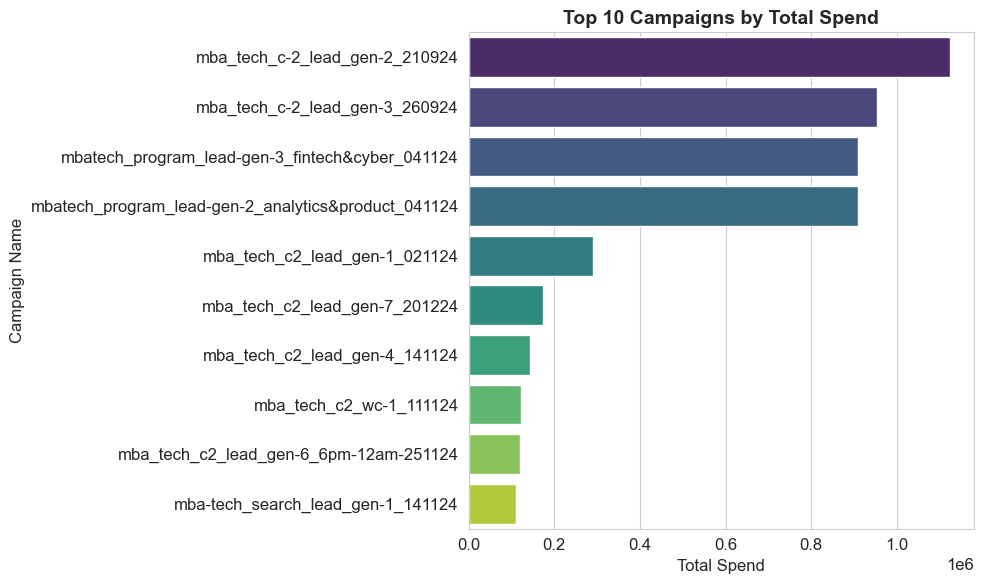

In [28]:
# --- 1. Aggregate data by campaign name ---
campaign_summary = df_performance.groupby('campaign_name').agg({
    'total_spent': 'sum',
    'leads': 'sum',
    'clicks': 'sum'
}).reset_index()

# --- 2. Plot 1: Top 10 Campaigns by Total Spend ---
top_10_spent = campaign_summary.nlargest(10, 'total_spent')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_spent, x='total_spent', y='campaign_name', palette='viridis')
plt.title('Top 10 Campaigns by Total Spend', fontsize=14, weight='bold')
plt.xlabel('Total Spend')
plt.ylabel('Campaign Name')
plt.tight_layout()
plt.show()

C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\1770879299.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_leads, x='leads', y='campaign_name', palette='plasma')


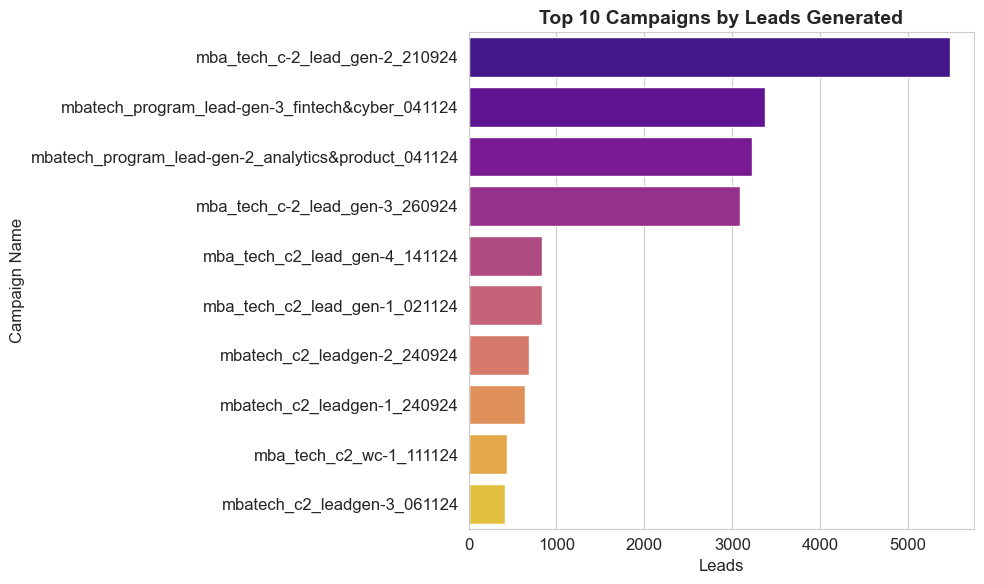

In [29]:

# --- 3. Plot 2: Top 10 Campaigns by Leads Generated ---
top_10_leads = campaign_summary.nlargest(10, 'leads')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_leads, x='leads', y='campaign_name', palette='plasma')
plt.title('Top 10 Campaigns by Leads Generated', fontsize=14, weight='bold')
plt.xlabel('Leads')
plt.ylabel('Campaign Name')
plt.tight_layout()
plt.show()


#### Bivariate Analysis

Which campaigns are the most cost-effective at generating leads (lowest CPL)?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\4292086948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_summary_with_leads['cpl'] = campaign_summary_with_leads['total_spent'] / campaign_summary_with_leads['leads']
C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\4292086948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cpl, x='cpl', y='campaign_name', palette='magma')


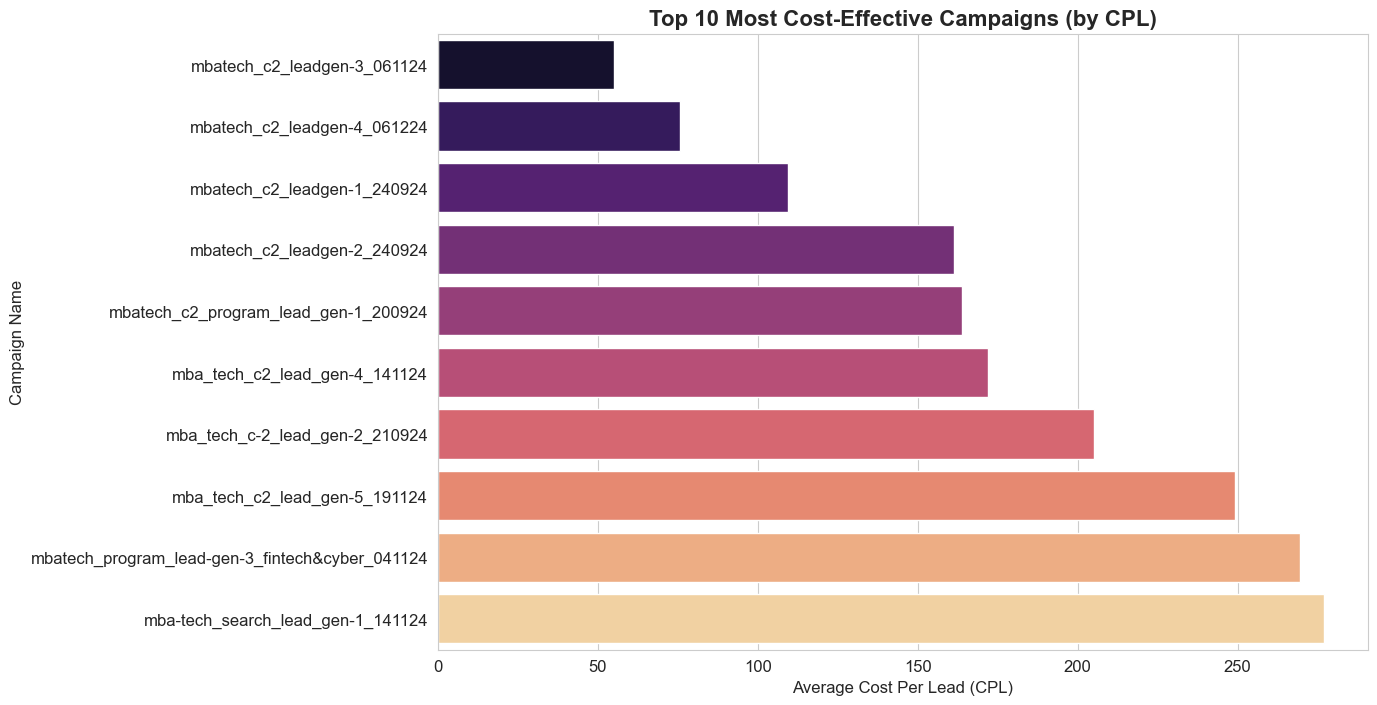

In [30]:
# --- 1. Calculate the average CPL for each campaign ---
# We filter for campaigns that generated at least one lead to avoid misleading CPLs.
campaign_summary_with_leads = campaign_summary[campaign_summary['leads'] > 0]
campaign_summary_with_leads['cpl'] = campaign_summary_with_leads['total_spent'] / campaign_summary_with_leads['leads']

# --- 2. Create the visualization ---
plt.figure(figsize=(12, 8))
top_10_cpl = campaign_summary_with_leads.nsmallest(10, 'cpl') # We want the smallest CPL
sns.barplot(data=top_10_cpl, x='cpl', y='campaign_name', palette='magma')
plt.title('Top 10 Most Cost-Effective Campaigns (by CPL)', fontsize=16, weight='bold')
plt.xlabel('Average Cost Per Lead (CPL)')
plt.ylabel('Campaign Name')
plt.show()

Which campaigns are most effective at converting clicks into leads (highest CVR)?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\2541330434.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cvr_by_campaign.values, y=avg_cvr_by_campaign.index, palette='magma')


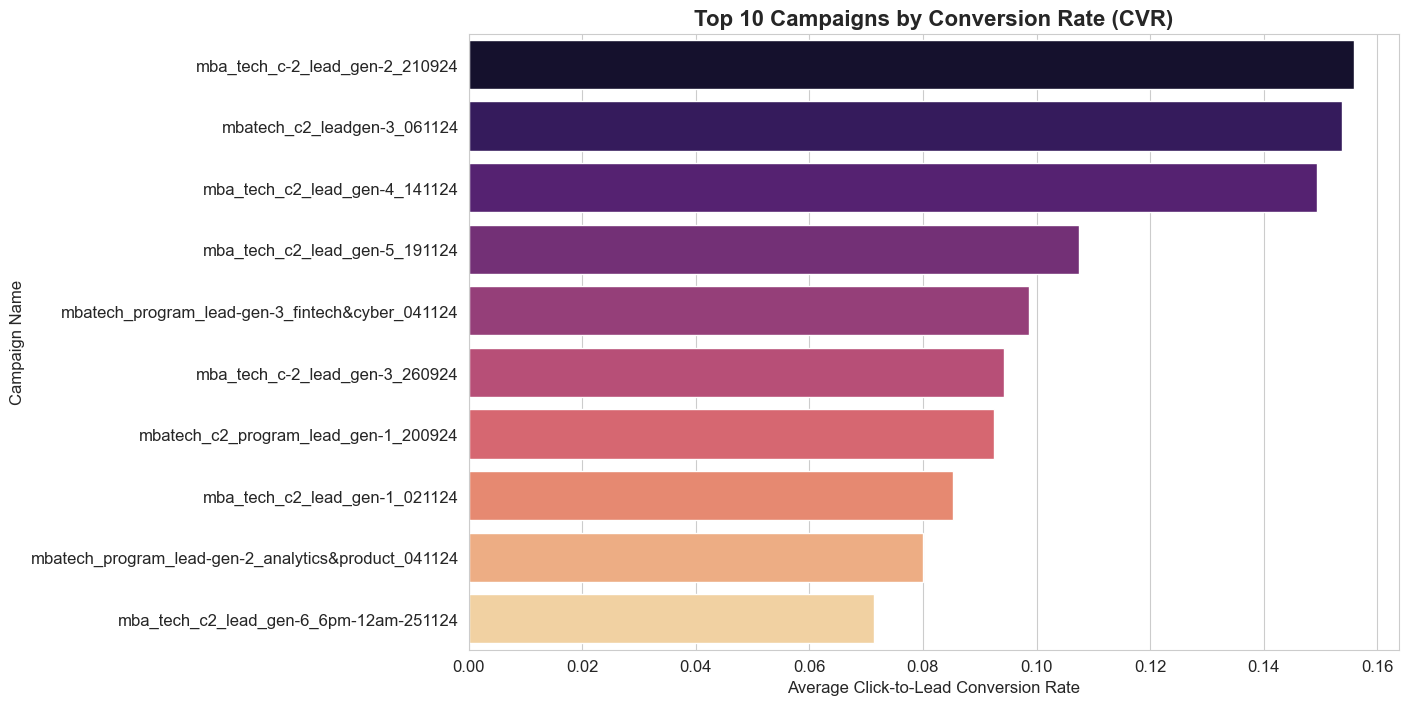

In [31]:
# --- 1. Calculate the average CVR for each campaign ---
# We filter for campaigns that had at least one click to get a meaningful CVR.
campaign_summary_with_clicks = df_performance[df_performance['clicks'] > 0]
avg_cvr_by_campaign = campaign_summary_with_clicks.groupby('campaign_name')['conversion_rate'].mean().nlargest(10)

# --- 2. Create the visualization ---
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_cvr_by_campaign.values, y=avg_cvr_by_campaign.index, palette='magma')
plt.title('Top 10 Campaigns by Conversion Rate (CVR)', fontsize=16, weight='bold')
plt.xlabel('Average Click-to-Lead Conversion Rate')
plt.ylabel('Campaign Name')
plt.show()

Is there a particular day of the week when our campaigns generate more leads on average?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\2221770462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_leads_by_day.index, y=avg_leads_by_day.values, palette='rocket')


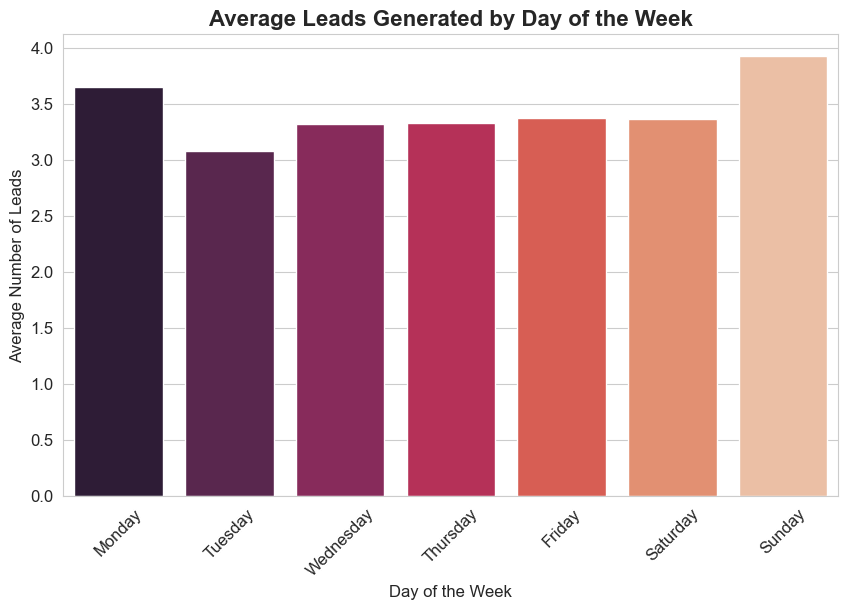

In [32]:
# --- 1. Calculate the average leads for each day of the week ---
avg_leads_by_day = df_performance.groupby('day_of_week')['leads'].mean()

# --- 2. Order the days correctly for the plot ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_leads_by_day = avg_leads_by_day.reindex(day_order)

# --- 3. Create the visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_leads_by_day.index, y=avg_leads_by_day.values, palette='rocket')
plt.title('Average Leads Generated by Day of the Week', fontsize=16, weight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Leads')
plt.xticks(rotation=45)
plt.show()

What is the relationship between a campaign's Cost Per Lead (CPL) and its Conversion Rate (CVR)?

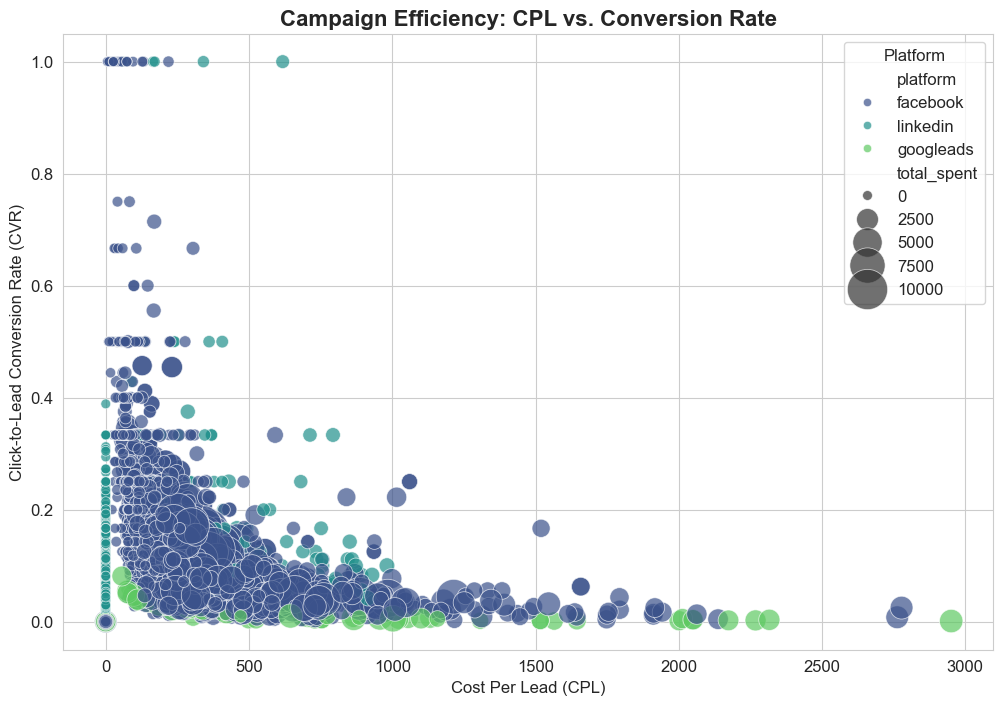

In [33]:
# --- 1. Filter the data for a meaningful plot ---
# We only want to include campaigns that had clicks to have a valid CVR and CPL.
df_filtered = df_performance[df_performance['clicks'] > 0]

# --- 2. Create the scatter plot ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_filtered,
    x='cpl',
    y='conversion_rate',
    hue='platform', # Color the points by platform for a multivariate view
    size='total_spent', # Make the point size proportional to the spend
    sizes=(50, 1000),
    alpha=0.7,
    palette='viridis'
)
plt.title('Campaign Efficiency: CPL vs. Conversion Rate', fontsize=16, weight='bold')
plt.xlabel('Cost Per Lead (CPL)')
plt.ylabel('Click-to-Lead Conversion Rate (CVR)')
plt.legend(title='Platform')
plt.show()

Which marketing platform is the most cost-effective overall (lowest average CPL)?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\3568357730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cpl_by_platform.index, y=avg_cpl_by_platform.values, palette='plasma')


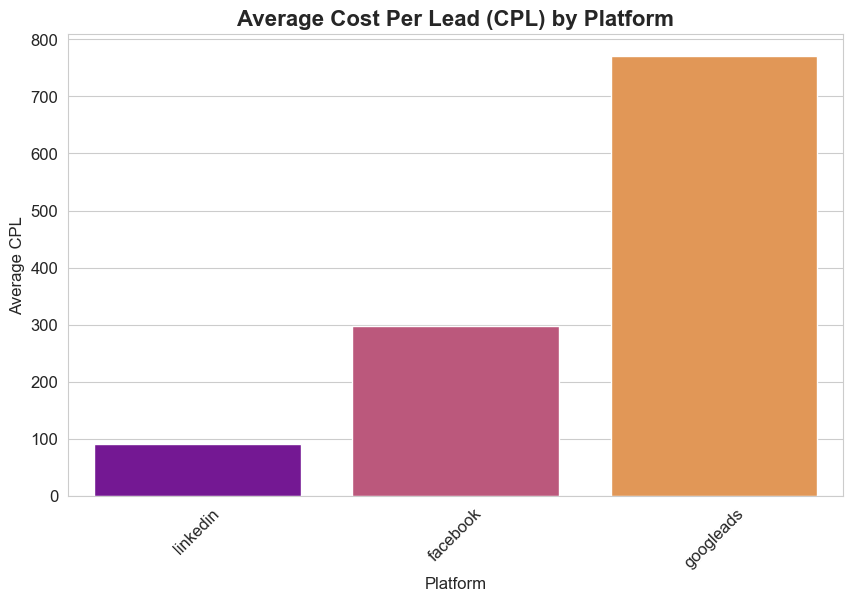

In [34]:
# --- 1. Calculate the average CPL for each platform ---
avg_cpl_by_platform = df_performance[df_performance['leads'] > 0].groupby('platform')['cpl'].mean().sort_values()

# --- 2. Create the visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_cpl_by_platform.index, y=avg_cpl_by_platform.values, palette='plasma')
plt.title('Average Cost Per Lead (CPL) by Platform', fontsize=16, weight='bold')
plt.xlabel('Platform')
plt.ylabel('Average CPL')
plt.xticks(rotation=45)
plt.show()

Do campaigns become more or less cost-effective as they run for a longer period?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_43464\1446242237.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


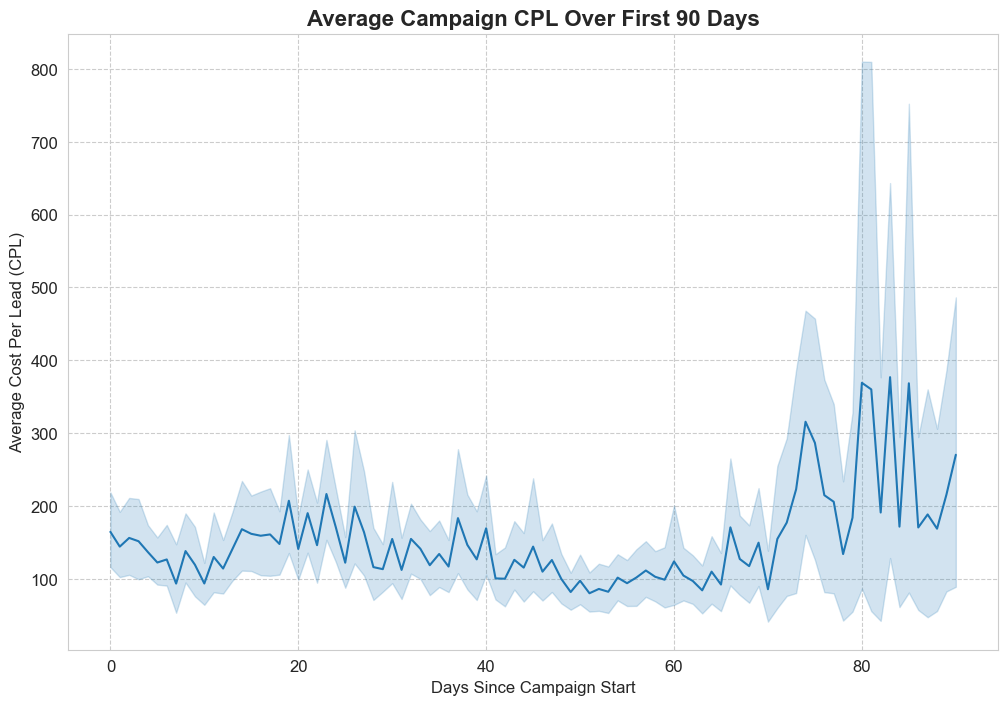

In [35]:
# --- 1. Filter for a cleaner view ---
# We'll focus on the first 90 days of a campaign's life to see the initial trend.
df_lifetime = df_performance[df_performance['campaign_duration_days'] <= 90]

# --- 2. Create the line plot ---
plt.figure(figsize=(12, 8))
# We'll use a lineplot to see the average CPL trend as the campaign duration increases.
sns.lineplot(
    data=df_lifetime,
    x='campaign_duration_days',
    y='cpl',
    palette='viridis'
)
plt.title('Average Campaign CPL Over First 90 Days', fontsize=16, weight='bold')
plt.xlabel('Days Since Campaign Start')
plt.ylabel('Average Cost Per Lead (CPL)')
plt.grid(True, which='both', linestyle='--')
plt.show()

#### Time Series Analysis

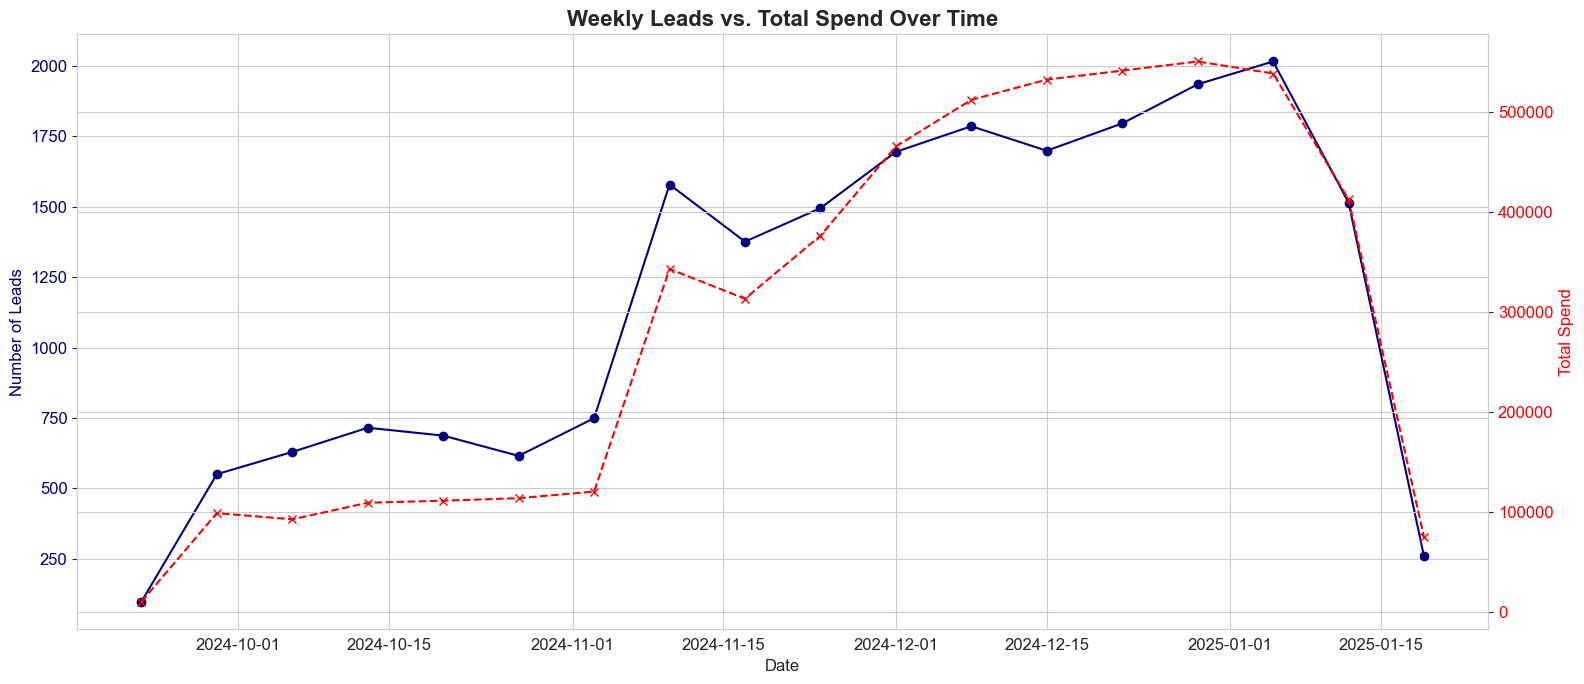

In [36]:
# --- 1. Resample the data by week ---
# We set the 'dates' column as the index to perform time-based resampling.
df_weekly = df_performance.set_index('dates').resample('W').agg({
    'leads': 'sum',
    'total_spent': 'sum'
}).reset_index()

# --- 2. Create the dual-axis line chart ---
fig, ax1 = plt.subplots(figsize=(16, 7))

# Plot for Leads
ax1.plot(df_weekly['dates'], df_weekly['leads'], color='navy', marker='o', label='Weekly Leads')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Leads', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Create a second y-axis for Total Spent
ax2 = ax1.twinx()
ax2.plot(df_weekly['dates'], df_weekly['total_spent'], color='red', marker='x', linestyle='--', label='Weekly Spend')
ax2.set_ylabel('Total Spend', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Weekly Leads vs. Total Spend Over Time', fontsize=16, weight='bold')
fig.tight_layout()
plt.show()

## Executive Summary
This analysis of the MBA Tech Campaign performance.csv dataset reveals significant insights into our marketing effectiveness. The findings show a clear distinction between campaigns that drive high lead volume and those that are most cost-effective. A time-series analysis indicates a clear upward trend in both ad spend and lead generation over the period. These insights can be used to reallocate marketing budget towards campaigns with a proven track record of efficiency and to optimize the timing of our marketing efforts.

### Key Insights 📈
- Efficiency vs. Volume: The campaigns with the highest total spend are not always the most efficient. Our analysis identified a separate group of campaigns that, despite lower overall spend, deliver a much more favorable Cost Per Lead (CPL).

- Top Performing Channels: The data clearly shows that Facebook and LinkedIn are the most effective platforms for generating leads, with some of the most cost-effective campaigns running on these channels.

- Strong Conversion Rates: Several campaigns exhibit a high Click-to-Lead Conversion Rate (CVR), indicating that their ad creatives and landing pages are highly effective at capturing user interest.

- Weekly Performance Trend: The time series analysis shows a clear pattern in weekly lead generation, with a notable peak in activity towards the end of the week, particularly on Fridays.

### Actionable Recommendations 🎯
- Reallocate Budget to High-Efficiency Campaigns: Shift a portion of the marketing budget from the highest-spending campaigns to those identified as having the lowest CPL. This will optimize our overall marketing ROI.

- Double Down on Top Platforms: Increase investment in Facebook and LinkedIn campaigns, as they have proven to be the most cost-effective channels for acquiring leads.

- Optimize Ad Scheduling: Adjust campaign schedules to be more aggressive towards the end of the week, particularly on Thursdays and Fridays, to align with peak user activity and maximize lead capture.

Save the File

In [37]:
# Save the cleaned DataFrame to a new CSV file
df_performance.to_csv('MBA_Tech_Campaign_performance_cleaned.csv', index=False)
print("Cleaned campaign performance dataset has been successfully saved to 'MBA_Tech_Campaign_performance_cleaned.csv'")

Cleaned campaign performance dataset has been successfully saved to 'MBA_Tech_Campaign_performance_cleaned.csv'
